## Medial Axis


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from skimage.morphology import medial_axis
from skimage.util import invert
from planning_graph import a_star
%matplotlib inline 

In [16]:
plt.rcParams['figure.figsize'] = 12, 12

In [17]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


Starting and goal positions in *(north, east)*.

In [18]:
start_ne = (25,  100)
goal_ne = (650, 500)

In [19]:
# Static drone altitude (meters)
drone_altitude = 5
safety_distance = 2

In [20]:
grid = create_grid(data, drone_altitude, safety_distance)
skeleton = medial_axis(invert(grid))


Plot the edges on top of the grid along with start and goal locations.

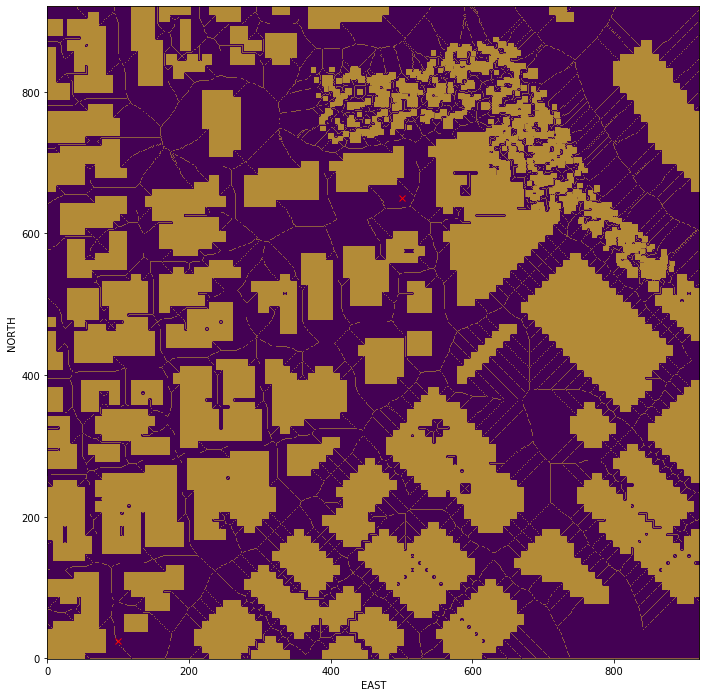

In [21]:
# equivalent to
# plt.imshow(np.flip(grid, 0))

plt.imshow(grid, origin='lower')
plt.imshow(skeleton, origin='lower', alpha=0.4)
    
plt.plot(start_ne[1], start_ne[0], 'rx')
plt.plot(goal_ne[1], goal_ne[0], 'rx')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [22]:
# TODO: Your start and goal location defined above
# will not necessarily be on the skeleton so you
# must first identify the nearest cell on the 
# skeleton to start and goal

# def find_start_goal(skel, start, goal):
#     # TODO: find start and goal on skeleton
#     # Some useful functions might be:
#         # np.nonzero()
#         # np.transpose()
#         # np.linalg.norm()
#         # np.argmin()

#     road_nodes = np.array(np.where(skel==True)).T
#     start_idx = (np.abs(road_nodes - start)).argmin()
#     near_start = road_nodes[start_idx]
#     goal_idx = (np.abs(road_nodes - goal)).argmin()
#     near_goal = road_nodes[goal_idx,:]

#     return tuple(near_start), tuple(near_goal)

def find_start_goal(skel, start, goal):
    skel_cells = np.transpose(skel.nonzero())
    start_min_dist = np.linalg.norm(np.array(start) - np.array(skel_cells), axis=1).argmin()
    near_start = skel_cells[start_min_dist]
    goal_min_dist = np.linalg.norm(np.array(goal) - np.array(skel_cells), axis=1).argmin()
    near_goal = skel_cells[goal_min_dist]
    
    return near_start, near_goal        
    
    
skel_start, skel_goal = find_start_goal(skeleton, start_ne, goal_ne)

print(start_ne, goal_ne)
print(skel_start, skel_goal)


(25, 100) (650, 500)
[24 99] [636 501]


In [23]:
def heuristic(p, goal, mode='euclid'):
    p = np.array(p); goal = np.array(goal)
    if mode=='euclid':
        h = np.sqrt( (p[0] - goal[0])**2 + (p[1]-goal[1])**2 )
    elif mode=='manhattan':
        h = np.abs(p[0] - goal[0]) + np.abs(p[1]-goal[1])
    else:
        h = np.linalg.norm(p - goal)
    return h

### TODO: Run A* on the skeleton
see [planning.py](/edit/planning.py) for a reminder on how to run the imported A* implementation (or rewrite it!)

In [25]:
path, cost = a_star(invert(skeleton).astype(np.int), heuristic, tuple(skel_start), tuple(skel_goal))

Found a path.


In [27]:
# Compare to regular A* on the grid
path2, cost2 = a_star(grid, heuristic, start_ne, goal_ne)

Found a path.


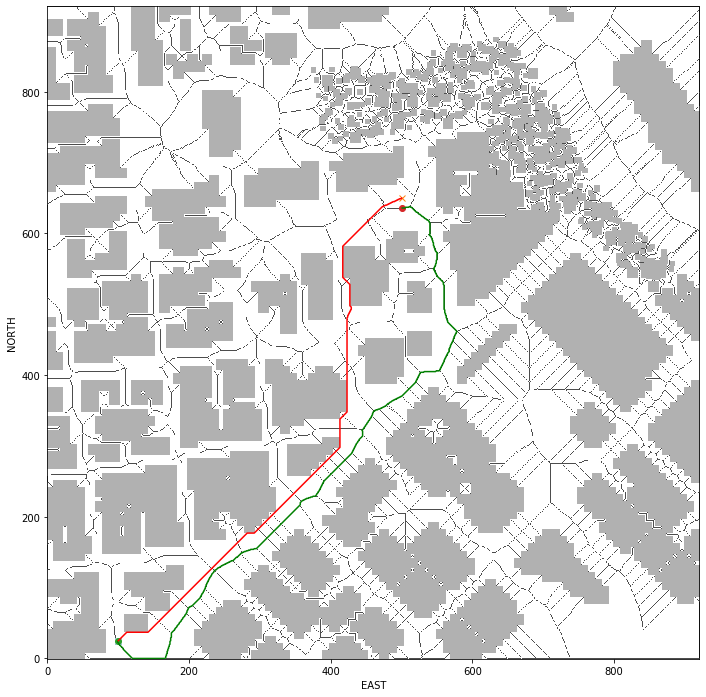

In [28]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'x')
# Uncomment the following as needed
plt.plot(goal_ne[1], goal_ne[0], 'x')

plt.plot(skel_start[1], skel_start[0], 'o')
plt.plot(skel_goal[1], skel_goal[0], 'o')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
pp2 = np.array(path2)
plt.plot(pp2[:, 1], pp2[:, 0], 'r')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()